In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_bike = pd.read_csv('http://bit.ly/dwp-data-bike')
data_youtube = pd.read_csv('http://bit.ly/dwp-data-youtube')
data_sales = pd.read_csv('http://bit.ly/dwp-data-ecommerce')
data_playstore = pd.read_csv('http://bit.ly/dwp-data-playstore')

In [6]:
df_bike = data_bike
df_youtube = data_youtube
df_sales = data_sales
df_playstore = data_playstore

----

## Pandas

### Categorical Data Type

In [42]:
df_bike['dayname'] = pd.Categorical(df_bike['dayname'],
                                    ordered=True,
                                    categories=['Monday',
                                               'Tuesday',
                                               'Wednesday',
                                               'Thursday',
                                               'Friday',
                                               'Saturday',
                                               'Sunday'])

### To Datetime (adjust formatting)

In [ ]:
# pd.to_datetime(data_youtube['trending_date'], format='%y.%d.%m')

## Data Visualization

### Bar Plot

In [ ]:
# 1. Berapa total trip (peminjaman sepeda) pada setiap hari nya (Senin, Selasa, Rabu, Kamis, dst)

# - ganti kolom starttime menjadi tipe data datetime
df_bike['starttime'] = pd.to_datetime(df_bike['starttime'])

# - ekstrak value yang diinginkan (hari) menggunakan .dt.strftime('')
df_bike['dayname'] = df_bike['starttime'].dt.strftime('%A')

# - ganti tipe data dayname menjadi categorical
df_bike['dayname'] = pd.Categorical(df_bike['dayname'],
                                    ordered=True,
                                    categories=['Monday',
                                               'Tuesday',
                                               'Wednesday',
                                               'Thursday',
                                               'Friday',
                                               'Saturday',
                                               'Sunday'])

# - Aggregasi data
#   - nilai yang dicari
#   - nilai yang dihitung
#   - fungsi aggregasi

total_by_dayname = df_bike.groupby('dayname', as_index=False)['bikeid'].count()

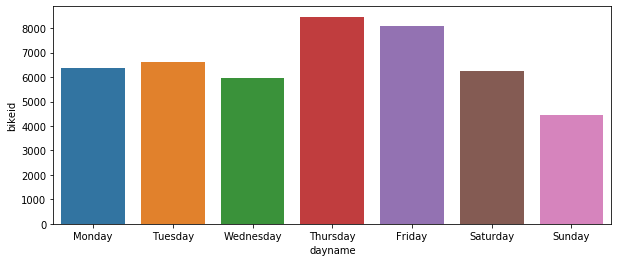

In [46]:
# Mengatur height x width visualisasi
plt.figure(figsize=(10,4))

# Visualisasi menggunakan seaborn
sns.barplot(data=total_by_dayname, x='dayname', y='bikeid')

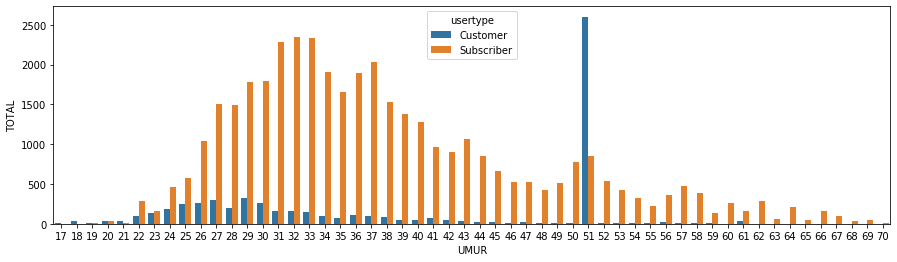

In [96]:
# Cari total user di setiap umur (dipecah berdasarkan usertype), visualisasikan dengan bar plot

# 1. buat kolom umur
df_bike['age'] = 2020 - df_bike['birth year']

# 2. aggregasi data
#   - yang dicari: umur - usertype
#   - yang dihitung: ...
#   - fungsi aggregasi: count
total_by_age = df_bike.groupby(['age', 'usertype'], as_index=False)['bikeid'].count() \
                      .rename(columns={'bikeid': 'total'})

# 3. visualisasi dengan seaborn (bar plot)
plt.figure(figsize=(15,4))

sns.barplot(data=total_by_age, x='age', y='total', hue='usertype')

plt.ylabel('TOTAL')
plt.xlabel('UMUR')
plt.show()

### Line Plot

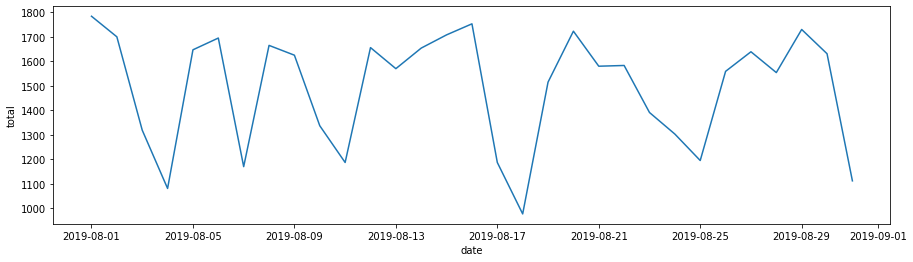

In [67]:
# 2. Berapa total trip di setiap tanggal ('2018-08-01' , 'year-month-date') , dan coba visualisasikan

# - ekstrak data tanggal
df_bike['date'] = df_bike['starttime'].dt.strftime('%Y-%m-%d')

# - aggregasi data
total_by_date = df_bike.groupby('date', as_index=False)['bikeid'].count() \
                       .rename(columns={'bikeid': 'total'})

total_by_date['date'] = pd.to_datetime(total_by_date['date'])

# - visualisasi data
plt.figure(figsize=(15,4))
sns.lineplot(data=total_by_date, x='date', y='total')

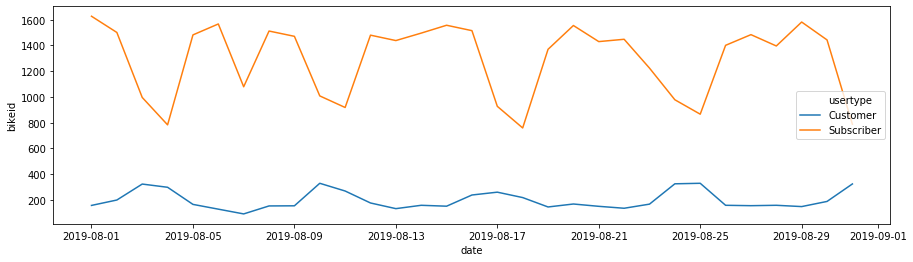

In [82]:
# Aggregasi Data
# - yang ingin kita cari (hari dan usertype)
# - yang ingin kita hitung
# - fungsi aggregasi

total_by_usertype = df_bike.groupby(['date', 'usertype'], as_index=False)['bikeid'].count()

total_by_usertype['date'] = pd.to_datetime(total_by_usertype['date'])

plt.figure(figsize=(15,4))
sns.lineplot(data=total_by_usertype, x='date', y='bikeid', hue='usertype')

## Data Analysis Process

Question - Wrangle - Explore - Conclusion - Communicate

In [104]:
df_youtube.head(2)

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

               publish_time    views  likes  dislikes  comment_count  \
0  2017-11-13T17:13:01.000Z   748374  57527      2966          15954   
1  2017-11-13T07:30:00.000Z  2418783  97185      6146          12703   

      category_name  
0  People and Blogs  
1     Entertainment

In [114]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       40949 non-null  object
 1   trending_date  40949 non-null  object
 2   title          40949 non-null  object
 3   channel_title  40949 non-null  object
 4   publish_time   40949 non-null  object
 5   views          40949 non-null  int64 
 6   likes          40949 non-null  int64 
 7   dislikes       40949 non-null  int64 
 8   comment_count  40949 non-null  int64 
 9   category_name  40949 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.1+ MB


#### Question

1. 5 Channel yang memiliki jumlah video paling banyak yang masuk trending?
2. 5 Video yang memiliki likes to views ratio paling tinggi?
3. ......

#### Wrangle

In [116]:
# 1. Buat "likes to view" ratio pada data
df_youtube['likes_to_view_ratio'] = df_youtube['likes'] / df_youtube['views']

#### Explore

#### 1. 5 Channel dengan video trending terbanyak

In [121]:
# Aggregasi data
# - yang kita cari: channel_title
# - yang kita hitung: ..
# - fungsi aggregasi: count

df_youtube.groupby('channel_title', as_index=False)['likes'].count() \
          .rename(columns={'likes': 'total'}) \
          .sort_values('total', ascending=False) \
          .head()

channel_title  total
555                                     ESPN    203
1785  The Tonight Show Starring Jimmy Fallon    197
1943                                     Vox    193
1271                                 Netflix    193
1804                            TheEllenShow    193

#### 2. 5 Video dengan likes to view ratio tertinggi

In [131]:
df_youtube.sort_values('likes_to_view_ratio', ascending=False)\
          .head()[['title', 'channel_title', 'likes_to_view_ratio']]

title       channel_title  \
10200  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...          Bruno Mars   
608            Luis Fonsi, Demi Lovato - Échame La Culpa       LuisFonsiVEVO   
22174                               j-hope 'Airplane' MV             ibighit   
14428                         dodie - Secret For The Mad           dodieVEVO   
5025         Louis Tomlinson - Miss You (Official Video)  LouisTomlinsonVEVO   

       likes_to_view_ratio  
10200             0.290466  
608               0.270613  
22174             0.265732  
14428             0.253659  
5025              0.245111

#### Conclusion

1. Channel yang memiliki jumlah video trending di Youtube adalah **Channel ESPN dengan total video sebanyak 203.**

2. Video yang memiliki likes to view ratio paling tinggi adalah video dari **Bruno Mars - Bruno Mars - Finesse (Remix) (Feat. Cardi B) dengan likes to view ratio 29%**